# **Mineração de Dados Aplicada ao desempenho de jogadores da NBA - Agrupamento**

Neste notebook, são aplicadas técnicas de clusterização sobre uma base de dados de desempenho individual de jogadores da NBA.  Utilizando técnicas de clusterização, é analisado o desempenho completo dos atletas para agrupá-los em perfis de performance distintos. Esta análise revela a estrutura real de papéis na liga.

Para a realização do estudo foi utilizada uma base de dados abragentes sobre o desempenho de jogadores da NBA, obtida na plataforma Kaggle. Especificamente, o trabalho se concentra na tabela PlayerTotals, que contém, estatísticas totais acumuladas por cada jogador ao longo de uma temporada, sendo que o conjunto de dados cobrem o período histórico da temporada de 1950 até a de 2025. Link database: https://www.kaggle.com/datasets/wyattowalsh/basketball

## **Etapa 1 - Importação de Bibliotecas e Base de Dados**

In [1]:
import os

# Listar os arquivos no diretório atual
os.listdir()


['archive.zip',
 'Agrupamento copy.ipynb',
 'doc.py',
 'NBA - Agrupamento.xlsx',
 '.venv',
 'base',
 'Agrupamento.ipynb',
 'PNS - Agrupamento - Médias.xlsx']

Nesta etapa, realizamos a importação das bibliotecas (pacotes) que serão utilizadas para a análise e agrupamento dos dados. Cada biblioteca oferece funcionalidades específicas que nos auxiliarão na manipulação, visualização e análise dos dados.

**Funcionalidades de Cada Biblioteca:**

* **NumPy:** Operações numéricas, criação de arrays e matrizes.
* **Pandas:** Manipulação e análise de dados, criação e manipulação de DataFrames.
* **Seaborn:** Visualização de dados, criação de gráficos estatísticos.
* **NetworkX:** Criação e manipulação de grafos, visualização de relações entre dados.
* **Matplotlib:** Criação de gráficos estáticos, oferece um conjunto completo de ferramentas para visualização de dados.
* **Plotly:** Criação de gráficos interativos, oferecendo uma ampla variedade de visualizações.
* **Itertools:** Geração de todas as combinações possíveis de elementos em um iterável.
* **Scikit-learn:**
  * **KMeans:** Implementação do algoritmo de clustering K-means.
  * **PCA:** Realização de Análise de Componentes Principais (PCA).
  * **silhouette_score:** Cálculo da métrica Silhouette para avaliar a qualidade dos clusters.
  * **silhouette_samples:** Cálculo dos coeficientes de silhouette para cada amostra.
  * **MinMaxScaler:** Escalonamento dos dados.

In [2]:
import numpy as np # Biblioteca fundamental para operações numéricas em Python, como criação de arrays e matrizes.
import pandas as pd # Biblioteca para manipulação e análise de dados, utilizada para criar e manipular DataFrames.
import seaborn as sns # Biblioteca para visualização de dados, oferecendo uma interface de alto nível para criar gráficos estatísticos.
import networkx as nx # Biblioteca para criação e manipulação de grafos, útil para visualizar relações entre dados.
import matplotlib.cm as cm # Biblioteca para criação de mapas de cores personalizados.
import plotly.express as px # Biblioteca para criação de gráficos interativos, oferecendo uma ampla variedade de visualizações.
import matplotlib.pyplot as plt # Biblioteca para criação de gráficos estáticos, oferecendo um conjunto completo de ferramentas para visualização de dados.
from sklearn.preprocessing import StandardScaler # Biblioteca de de padronização de dados.
import plotly.graph_objects as go # Biblioteca para criação de gráficos interativos complexos.
from itertools import combinations # Biblioteca para gerar todas as combinações possíveis de elementos em um iterável.
from sklearn.cluster import KMeans # Biblioteca para implementar o algoritmo de clustering K-means.
from sklearn.decomposition import PCA # Biblioteca para realizar Análise de Componentes Principais (PCA), uma técnica de redução de dimensionalidade.
from sklearn.metrics import silhouette_score # Biblioteca para calcular a métrica Silhouette, utilizada para avaliar a qualidade dos clusters.
from sklearn.metrics import silhouette_samples # Biblioteca para calcular os coeficientes de silhouette para cada amostra.
from sklearn.preprocessing import MinMaxScaler # Biblioteca para escalonar os dados, colocando todas as features em uma mesma escala.
print('Bibliotecas carregadas com sucesso')


Bibliotecas carregadas com sucesso


In [3]:
# importa o arquivo e guarda em um dataframe do Pandas
import pandas as pd

dfAllStarSelections = pd.read_excel("base/All-Star Selections.xlsx")
dfEndOfSeasonTeamsVoting = pd.read_excel("base/End of Season Teams (Voting).xlsx")
dfOpponentStatsPerGame = pd.read_excel("base/Opponent Stats Per Game.xlsx")
dfPlayerAwardShares = pd.read_excel("base/Player Award Shares.xlsx")
dfPlayerCareerInfo = pd.read_excel("base/Player Career Info.xlsx")
dfPlayerDirectory = pd.read_excel("base/Player Directory.xlsx")
dfPlayerPerGame = pd.read_excel("base/Player Per Game.xlsx")
dfPlayerPlayByPlay = pd.read_excel("base/Player Play By Play.xlsx")
dfPlayerSeasonInfo = pd.read_excel("base/Player Season Info.xlsx")
dfPlayerShooting = pd.read_excel("base/Player Shooting.xlsx")
dfPlayerTotals = pd.read_excel("base/Player Totals.xlsx")
dfTeamAbbrev = pd.read_excel("base/Team Abbrev.xlsx")
dfTeamStatsPer100Poss = pd.read_excel("base/Team Stats Per 100 Poss.xlsx")
dfTeamStatsPerGame = pd.read_excel("base/Team Stats Per Game.xlsx")
dfTeamSummaries = pd.read_excel("base/Team Summaries.xlsx")
dfTeamTotals = pd.read_excel("base/Team Totals.xlsx")

print("Dados importados com sucesso!")

dfDataBaseR = dfAllStarSelections,dfEndOfSeasonTeamsVoting,dfOpponentStatsPerGame,dfPlayerAwardShares,dfPlayerCareerInfo,dfPlayerDirectory,dfPlayerPerGame,dfPlayerPlayByPlay,dfPlayerSeasonInfo,dfPlayerShooting,dfPlayerTotals,dfTeamAbbrev,dfTeamStatsPer100Poss,dfTeamStatsPerGame,dfTeamSummaries,dfTeamTotals


Dados importados com sucesso!


In [4]:
def print_shape(name, df):
    num_linhas, num_colunas = df.shape
    print(f'{name}: \nLinhas: {num_linhas}\nColunas: {num_colunas}\n')

print_shape('All-Star Selections', dfAllStarSelections)
print_shape('End of Season Teams (Voting)', dfEndOfSeasonTeamsVoting)
print_shape('Opponent Stats Per Game', dfOpponentStatsPerGame)
print_shape('Player Award Shares', dfPlayerAwardShares)
print_shape('Player Career Info', dfPlayerCareerInfo)
print_shape('Player Directory', dfPlayerDirectory)
print_shape('Player Per Game', dfPlayerPerGame)
print_shape('Player Play By Play', dfPlayerPlayByPlay)
print_shape('Player Season Info', dfPlayerSeasonInfo)
print_shape('Player Shooting', dfPlayerShooting)
print_shape('Player Totals', dfPlayerTotals)
print_shape('Team Abbrev', dfTeamAbbrev)
print_shape('Team Stats Per 100 Poss', dfTeamStatsPer100Poss)
print_shape('Team Stats Per Game', dfTeamStatsPerGame)
print_shape('Team Summaries', dfTeamSummaries)
print_shape('Team Totals', dfTeamTotals)


All-Star Selections: 
Linhas: 2000
Colunas: 5

End of Season Teams (Voting): 
Linhas: 4412
Colunas: 16

Opponent Stats Per Game: 
Linhas: 1876
Colunas: 28

Player Award Shares: 
Linhas: 3376
Colunas: 12

Player Career Info: 
Linhas: 5313
Colunas: 7

Player Directory: 
Linhas: 5285
Colunas: 10

Player Per Game: 
Linhas: 32605
Colunas: 35

Player Play By Play: 
Linhas: 17520
Colunas: 28

Player Season Info: 
Linhas: 32605
Colunas: 10

Player Shooting: 
Linhas: 17520
Colunas: 34

Player Totals: 
Linhas: 32605
Colunas: 35

Team Abbrev: 
Linhas: 1871
Colunas: 5

Team Stats Per 100 Poss: 
Linhas: 1432
Colunas: 28

Team Stats Per Game: 
Linhas: 1876
Colunas: 28

Team Summaries: 
Linhas: 1876
Colunas: 31

Team Totals: 
Linhas: 1876
Colunas: 28



## **Etapa 2 - Filtro da base dados**

Nesta etapa, filtramos a base de dados para reter apenas informações relevantes, preparando-a para a aplicação de diversos algoritmos de mineração de dados, focados em análises e visualizações eficazes relacionadas à dor crônica na coluna.

### **2.1 - Listagem de Colunas**

In [5]:
# Convertendo a lista de colunas em uma string e imprimindo
def print_columns(name, df):
    print(f"{name}:\n")
    print(',\n'.join(df.columns))
    print('\n-------------------------\n')

print_columns('All-Star Selections', dfAllStarSelections)
print_columns('End of Season Teams (Voting)', dfEndOfSeasonTeamsVoting)
print_columns('Opponent Stats Per Game', dfOpponentStatsPerGame)
print_columns('Player Award Shares', dfPlayerAwardShares)
print_columns('Player Career Info', dfPlayerCareerInfo)
print_columns('Player Directory', dfPlayerDirectory)
print_columns('Player Per Game', dfPlayerPerGame)
print_columns('Player Play By Play', dfPlayerPlayByPlay)
print_columns('Player Season Info', dfPlayerSeasonInfo)
print_columns('Player Shooting', dfPlayerShooting)
print_columns('Player Totals', dfPlayerTotals)
print_columns('Team Abbrev', dfTeamAbbrev)
print_columns('Team Stats Per 100 Poss', dfTeamStatsPer100Poss)
print_columns('Team Stats Per Game', dfTeamStatsPerGame)
print_columns('Team Summaries', dfTeamSummaries)
print_columns('Team Totals', dfTeamTotals)


All-Star Selections:

player,
team,
lg,
season,
replaced

-------------------------

End of Season Teams (Voting):

season,
lg,
type,
number_tm,
position,
player,
age,
tm,
pts_won,
pts_max,
share,
x1st_tm,
x2nd_tm,
x3rd_tm,
seas_id,
player_id

-------------------------

Opponent Stats Per Game:

season,
lg,
team,
abbreviation,
playoffs,
g,
mp_per_game,
opp_fg_per_game,
opp_fga_per_game,
opp_fg_percent,
opp_x3p_per_game,
opp_x3pa_per_game,
opp_x3p_percent,
opp_x2p_per_game,
opp_x2pa_per_game,
opp_x2p_percent,
opp_ft_per_game,
opp_fta_per_game,
opp_ft_percent,
opp_orb_per_game,
opp_drb_per_game,
opp_trb_per_game,
opp_ast_per_game,
opp_stl_per_game,
opp_blk_per_game,
opp_tov_per_game,
opp_pf_per_game,
opp_pts_per_game

-------------------------

Player Award Shares:

season,
award,
player,
age,
tm,
first,
pts_won,
pts_max,
share,
winner,
seas_id,
player_id

-------------------------

Player Career Info:

player_id,
player,
birth_year,
hof,
num_seasons,
first_seas,
last_seas

-------------

### **2.3 - Seleção de Total**

In [6]:
# Lista das colunas
todasColunas = [
  
"seas_id",
"season",
"player_id",
"player",
"birth_year",
"pos",
"age",
"experience",
"lg",
"tm",
"g",
"gs",
"mp",
"fg",
"fga",
"fg_percent",
"x3p",
"x3pa",
"x3p_percent",
"x2p",
"x2pa",
"x2p_percent",
"e_fg_percent",
"ft",
"fta",
"ft_percent",
"orb",
"drb",
"trb",
"ast",
"stl",
"blk",
"tov",
"pf",
"pts"
]


# Criando DataFrame filtrado
dfGeralR = dfPlayerTotals[todasColunas].copy()

# Garantindo que as colunas numéricas sejam float
cols_numericas = dfGeralR.select_dtypes(include=["int", "float"]).columns
dfGeralR[cols_numericas] = dfGeralR[cols_numericas].astype(float)


# Exibir as primeiras linhas do dataframe filtrado
dfGeralR.head(10)

seas_id  season  player_id         player  birth_year pos   age  \
0  31871.0  2025.0     5025.0     A.J. Green         NaN  SG  25.0   
1  31872.0  2025.0     5026.0    A.J. Lawson         NaN  SG  24.0   
2  31873.0  2025.0     5210.0     AJ Johnson         NaN  SG  20.0   
3  31874.0  2025.0     5210.0     AJ Johnson         NaN  SG  20.0   
4  31875.0  2025.0     5210.0     AJ Johnson         NaN  SG  20.0   
5  31876.0  2025.0     4219.0   Aaron Gordon         NaN  PF  29.0   
6  31877.0  2025.0     4582.0  Aaron Holiday         NaN  PG  28.0   
7  31878.0  2025.0     4805.0  Aaron Nesmith         NaN  SF  25.0   
8  31879.0  2025.0     4900.0  Aaron Wiggins         NaN  SG  26.0   
9  31880.0  2025.0     5109.0   Adam Flagler         NaN  SG  25.0   

   experience   lg   tm  ...  ft_percent   orb    drb    trb    ast   stl  \
0         3.0  NBA  MIL  ...       0.815  18.0  156.0  174.0  108.0  37.0   
1         3.0  NBA  TOR  ...       0.683  20.0   66.0   86.0   31.0  13.0   
2         1.0  NBA  TOT  ...       0.865   8.0   51.0   59.0   76.0  12.0   
3         1.0  NBA  MIL  ...       0.500   0.0    7.0    7.0    7.0   1.0   
4         1.0  NBA  WAS  ...       0.886   8.0   44.0   52.0   69.0  11.0   
5        11.0  NBA  DEN  ...       0.810  80.0  167.0  247.0  164.0  23.0   
6         7.0  NBA  HOU  ...       0.829  13.0   65.0   78.0   83.0  19.0   
7         5.0  NBA  IND  ...       0.913  37.0  141.0  178.0   54.0  35.0   
8         4.0  NBA  OKC  ...       0.831  81.0  214.0  295.0  134.0  60.0   
9         2.0  NBA  OKC  ...       0.500   7.0   20.0   27.0   12.0   8.0   

    blk   tov     pf    pts  
0   7.0  40.0  157.0  541.0  
1   6.0  15.0   44.0  236.0  
2   3.0  35.0   50.0  220.0  
3   0.0   4.0    0.0   20.0  
4   3.0  31.0   50.0  200.0  
5  14.0  73.0   82.0  748.0  
6  11.0  37.0   64.0  340.0  
7  17.0  37.0  114.0  541.0  
8  18.0  69.0  101.0  914.0  
9   3.0   4.0   15.0   65.0  

[10 rows x 35 columns]

### Atributos descritos

* **`"seas_id"`: ID da Temporada (Season ID)**
   

* **`"season"`: Temporada (Season)**
  

* **`"player_id"`: ID do Jogador (Player ID)**


* **`"player"`: Jogador (Player)**
   

* **`"birth_year"`: Ano de Nascimento (Birth Year)**
   

* **`"pos"`: Posição (Position)**
    * **Descrição:** A posição principal em que o jogador atua. Geralmente abreviada, como:
        * **PG:** Point Guard (Armador)
        * **SG:** Shooting Guard (Ala-armador)
        * **SF:** Small Forward (Ala)
        * **PF:** Power Forward (Ala-pivô)
        * **C:** Center (Pivô)

* **`"age"`: Idade (Age)**
    
* **`"experience"`: Experiência (Experience)**
   
* **`"lg"`: Liga (League)**
   

* **`"tm"`: Time (Team)**
 
---

### **Estatísticas de Jogo e Participação**

* **`"g"`: Jogos Disputados (Games Played)**
    

* **`"gs"`: Jogos como Titular (Games Started)**
    

* **`"mp"`: Minutos Jogados (Minutes Played)**
   

---

### **Estatísticas de Arremessos (Shooting)**

* **`"fg"`: Arremessos de Quadra Convertidos (Field Goals Made)**
    

* **`"fga"`: Tentativas de Arremessos de Quadra (Field Goal Attempts)**
    

* **`"fg_percent"`: Percentual de Arremessos de Quadra (Field Goal Percentage)**
    
* **`"x3p"`: Arremessos de 3 Pontos Convertidos (3-Point Field Goals Made)**
    
* **`"x3pa"`: Tentativas de Arremessos de 3 Pontos (3-Point Field Goal Attempts)**
   

* **`"x3p_percent"`: Percentual de Arremessos de 3 Pontos (3-Point Field Goal Percentage)**
    

* **`"x2p"`: Arremessos de 2 Pontos Convertidos (2-Point Field Goals Made)**
    

* **`"x2pa"`: Tentativas de Arremessos de 2 Pontos (2-Point Field Goal Attempts)**
    

* **`"x2p_percent"`: Percentual de Arremessos de 2 Pontos (2-Point Field Goal Percentage)**
    

* **`"e_fg_percent"`: Percentual de Arremessos de Quadra Efetivo (Effective Field Goal Percentage)**
    

* **`"ft"`: Lances Livres Convertidos (Free Throws Made)**
    

* **`"fta"`: Tentativas de Lances Livres (Free Throw Attempts)**
    

* **`"ft_percent"`: Percentual de Lances Livres (Free Throw Percentage)**
    

---

### **Outras Estatísticas Principais**

* **`"orb"`: Rebotes Ofensivos (Offensive Rebounds)**
    

* **`"drb"`: Rebotes Defensivos (Defensive Rebounds)**
    

* **`"trb"`: Total de Rebotes (Total Rebounds)**


* **`"ast"`: Assistências (Assists)**
    

* **`"stl"`: Roubos de Bola (Steals)**
    

* **`"blk"`: Tocos (Blocks)**
    

* **`"tov"`: Desperdícios de Bola (Turnovers)**
   

* **`"pf"`: Faltas Pessoais (Personal Fouls)**
    

* **`"pts"`: Pontos (Points)**
    

#### Correção na base de dados

Para corrigir a duplicidade de registros, que ocorre quando um jogador atua por mais de um time na mesma temporada, foi realizado um processo de agregação de dados. Utilizando a função groupby(), todos os registros de um mesmo jogador (player) na mesma temporada (season) foram agrupados. Em seguida, as estatísticas de volume (como pontos, rebotes e assistências) foram somadas para obter o total consolidado da temporada. Atributos estáticos, como idade e experiência, tiveram seu valor máximo preservado. O resultado é o DataFrame df_agregado, uma base de dados limpa onde cada jogador possui um registro único e completo por temporada, garantindo a precisão da análise de clusterização.

In [ ]:
# --- CORREÇÃO DE AGREGAÇÃO ---


regras_de_agregacao = {
    
    'g': 'sum',
    'orb': 'sum',
    'drb': 'sum',
    'ast': 'sum',
    'stl': 'sum',
    'blk': 'sum',
    'tov': 'sum',
    'pf': 'sum',
    'pts': 'sum',
    'fga': 'sum',
    'fg': 'sum',   
    'x3p': 'sum',  
    'x3pa': 'sum', 
    'x2p': 'sum',  
    'x2pa': 'sum', 
    
    
    'age': 'max',
    'experience': 'max'
}

# Agrupe por jogador e temporada e aplique as regras CORRIGIDAS
df_agregado = dfGeralR.groupby(['player', 'season']).agg(regras_de_agregacao).reset_index()

df_agregado.head(20)

dfPlayerStats = df_agregado


### **2.3 - Seleção de atributos**

Nesta etapa, o objetivo é isolar as informações mais relevantes para a análise de agrupamento, focando especificamente nas comorbidades dos indivíduos. Ao criar um novo DataFrame com apenas as colunas de interesse, facilitamos a análise e a interpretação dos resultados, além de otimizar o processo computacional.

In [ ]:
colunasInteresse = [ 
"age",
"experience",
"g",
"orb",
"drb",
"ast",
"stl",
"blk",
"tov",
"pf",
"pts",
"fga",
"fg",
"x3p",
"x3pa",
"x2p",
"x2pa"


 ]

# Criando um novo DataFrame com apenas as colunas de interesse
dfPlayerStats = df_agregado[colunasInteresse].copy()

# Tratando X em NaN
dfPlayerStats.fillna(0, inplace=True)

# Exibir as primeiras linhas do dataframe filtrado
dfPlayerStats.head(100)


age  experience     g    orb    drb    ast   stl   blk    tov     pf  \
0   22.0         1.0  82.0  160.0  221.0   54.0  49.0  49.0   99.0  229.0   
1   23.0         2.0  79.0  210.0  405.0   84.0  70.0  80.0  102.0  171.0   
2   24.0         3.0  82.0  245.0  465.0   93.0  87.0  45.0  120.0  204.0   
3   25.0         4.0  82.0  258.0  481.0  103.0  94.0  55.0  119.0  172.0   
4   26.0         5.0  82.0  262.0  450.0   90.0  66.0  50.0  116.0  207.0   
..   ...         ...   ...    ...    ...    ...   ...   ...    ...    ...   
95  32.0        11.0  68.0   20.0  152.0  103.0  48.0  17.0   31.0  116.0   
96  33.0        12.0  14.0    3.0   17.0   11.0   5.0   0.0    2.0    7.0   
97  34.0        13.0  10.0    1.0   17.0   13.0   4.0   0.0    8.0   14.0   
98  22.0         1.0  19.0    0.0   14.0   24.0   4.0   1.0   11.0   13.0   
99  21.0         1.0  46.0   28.0   99.0   23.0  15.0   9.0   23.0   87.0   

       pts    fga     fg   x3p   x3pa    x2p   x2pa  
0    521.0  388.0  209.0   1.0    6.0  208.0  382.0  
1    852.0  587.0  316.0   0.0    5.0  316.0  582.0  
2    937.0  640.0  322.0   0.0    2.0  322.0  638.0  
3   1088.0  758.0  401.0   4.0   17.0  397.0  741.0  
4   1061.0  806.0  385.0  13.0   46.0  372.0  760.0  
..     ...    ...    ...   ...    ...    ...    ...  
95   152.0  142.0   61.0  20.0   62.0   41.0   80.0  
96     7.0   12.0    3.0   0.0    2.0    3.0   10.0  
97    22.0   17.0   11.0   0.0    0.0   11.0   17.0  
98    16.0   18.0    6.0   0.0    0.0    6.0   18.0  
99   218.0  178.0   78.0  40.0  108.0   38.0   70.0  

[100 rows x 17 columns]

## **Etapa 3 - Alternativa de PCA**

Nesta análise, um conjunto de estatísticas de jogadores foi padronizado e processado através da Análise de Componentes Principais (PCA) para reduzir sua dimensionalidade a dois componentes principais. O objetivo é visualizar o perfil de cada jogador em um espaço bidimensional, onde os eixos representam:

 * Componente 1 (Eixo X): O volume total de produção, separando estrelas e titulares de jogadores com menor tempo de quadra.

 * Componente 2 (Eixo Y): O estilo de jogo predominante, contrastando jogadores de perímetro (lado positivo) com jogadores de garrafão (lado negativo).Desta forma, o gráfico final não avalia o desempenho de forma absoluta, mas sim classifica e agrupa os jogadores com base em seus volumes e estilos de jogo.


DataFrame agregado e limpo criado com sucesso!
Número de linhas após agregação: 26356


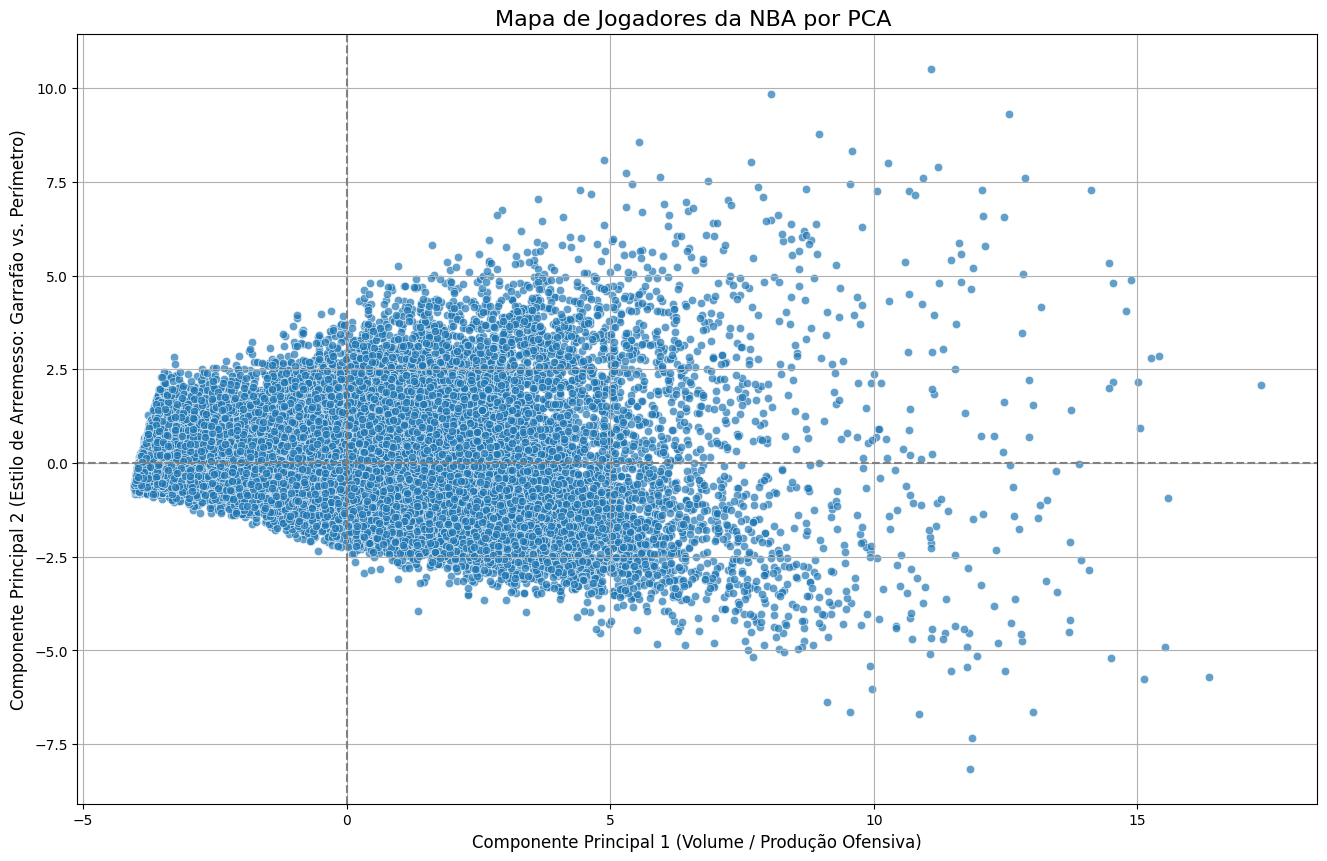

In [9]:
regras_de_agregacao = {
    
    'g': 'sum',
    'orb': 'sum',
    'drb': 'sum',
    'ast': 'sum',
    'stl': 'sum',
    'blk': 'sum',
    'tov': 'sum',
    'pf': 'sum',
    'pts': 'sum',
    'fga': 'sum',
    'fg': 'sum',
    'x3p': 'sum',
    'x3pa': 'sum',
    'x2p': 'sum',
    'x2pa': 'sum',


    # Atributos que NÃO devem ser somados (pegamos o maior valor)
    'age': 'max',
    'experience': 'max',
    'tm': 'first'
}

# Agrupe por jogador e temporada e aplique as regras.
# Use as colunas corretas que identificam um jogador, ex: 'player', 'season'.
df_agregado = dfPlayerTotals.groupby(['player', 'season']).agg(regras_de_agregacao).reset_index()

print("DataFrame agregado e limpo criado com sucesso!")
print(f"Número de linhas após agregação: {len(df_agregado)}")


# --- ETAPA 2: PREPARAÇÃO PARA O PCA (SEU CÓDIGO, AGORA ADAPTADO) ---


# 1.1: Lista de colunas para o PCA
colunas_para_pca = [
    "age", "experience", "g", "orb", "drb", "ast", "stl", "blk",
    "tov", "pf", "pts", "fga", "fg", "x3p", "x3pa", "x2p", "x2pa"
]

# 1.2: Crie um novo DataFrame apenas com essas colunas, a partir do DataFrame LIMPO
df_numerico = df_agregado[colunas_para_pca].dropna()

# 1.3: Guarda os nomes dos jogadores e outras informações para usar depois
df_info = df_agregado.loc[df_numerico.index, ['player', 'season', 'tm']]

# 1.4: Padronização dos dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df_numerico)



# 2.1: Crie e ajuste a PCA
nComponents = 2
pca = PCA(n_components=nComponents)

# 2.2: Ajuste aos dados PADRONIZADOS e CAPTURE OS RESULTADOS
principal_components = pca.fit_transform(dados_padronizados)


# 3.1: Recebendo em um dataframe os resultados do PCA
df_pca_resultado = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2'],
    index=df_numerico.index # Garante que os índices sejam os mesmos
)

# 3.2: Junte as informações dos jogadores com os resultados da PCA
df_final_plot = pd.concat([df_info.reset_index(drop=True), df_pca_resultado.reset_index(drop=True)], axis=1)



import plotly.io as pio
# --- Gráfico Estático ---

plt.figure(figsize=(16, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_final_plot, alpha=0.7)

plt.title('Mapa de Jogadores da NBA por PCA ', fontsize=16)
plt.xlabel('Componente Principal 1 (Volume / Produção Ofensiva)', fontsize=12)
plt.ylabel('Componente Principal 2 (Estilo de Arremesso: Garrafão vs. Perímetro)', fontsize=12)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.show()


# --- Gráfico Interativo com Plotly  ---

fig = px.scatter(
    df_final_plot,
    x='PC1',
    y='PC2',
    hover_data=['player', 'season'], # Agora a coluna 'tm' existe!
    title='Mapa Interativo de Jogadores da NBA por PCA',
    labels={
        "PC1": "Componente Principal 1 (Volume / Produção Ofensiva)",
        "PC2": "Componente Principal 2 (Estilo de Arremesso)"
    }
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.add_vline(x=0, line_width=1, line_dash="dash", line_color="grey")
fig.add_hline(y=0, line_width=1, line_dash="dash", line_color="grey")
fig.show()

## **Etapa 4 - Agrupamento (Clustering)**

Nesta etapa aplicamos técnicas de clustering aos dados, com o objetivo de identificar padrões e grupos relacionados à incidência de dor crônica na coluna.

### **4.1 - Análise de Componentes Principais - PCA**

A etapa da Análise de Componentes Principais (PCA) tem como objetivo reduzir a dimensionalidade dos dados, ou seja, transformar um conjunto de variáveis altamente correlacionadas em um conjunto menor de novas variáveis, chamadas de componentes principais, que capturam a maior parte da variância dos dados originais. No contexto da análise de comorbidades, a PCA auxilia na identificação de padrões subjacentes entre as doenças e na visualização dos dados em um espaço de menor dimensão.

#### **4.1.1 - Aplicação do PCA**


*   **Componente:** Esta coluna lista as características ou colunas originais do seu conjunto de dados. Cada linha não representa a própria coluna, mas sim o componente principal que foi formado a partir de uma combinação de todas as características originais.

*   **Variação Explicada:** Esta coluna mostra quanto da variação total dos dados cada componente principal captura. Estes valores são importantes porque indicam quanta informação cada componente está capturando. Em PCA, os componentes são ordenados de forma que o primeiro captura a maioria da variação, e cada componente subsequente captura progressivamente menos.

*   **Variação Acumulada:** Esta coluna mostra a porcentagem da variação total capturada quando você soma os componentes principais até aquele ponto. Quando a variação acumulada chega a 100%, significa que todos os componentes juntos estão capturando toda a variação dos seus dados.

In [35]:
# Copiando variáveis necessárias
dfPCA = dfPlayerStats.copy()

# Aplicando PCA para visualização total
nComponents = 4
pca = PCA(nComponents)
pca.fit_transform(dfPCA)

# Variação explicada por cada componente
explainedVariance = pca.explained_variance_ratio_
cumulativeExplainedVariance = np.cumsum(explainedVariance)

# Criando um DataFrame para armazenar os resultados
data = {
    "Componente": [f"{i}" for i in range(1, nComponents + 1)],
    "Variação Explicada": explainedVariance,
    "Variação Acumulada": cumulativeExplainedVariance
}

resultPCA = pd.DataFrame(data)

# Exibindo o DataFrame
print(resultPCA.to_string(index=False))

#------------------------------------------------------------------------

# Aplicando PCA para os componentes que desejamos
nComponentsFinal = 2 # número de componentes principais desejados
pcaFinal = PCA(nComponentsFinal)
dfPCA = pcaFinal.fit_transform(dfPCA)

Componente  Variação Explicada  Variação Acumulada
         1            0.906967            0.906967
         2            0.038743            0.945710
         3            0.027499            0.973208
         4            0.012629            0.985837


#### **4.1.2 - Análise Gráfica - Variação Acumulada**

Este tipo de gráfico é extremamente útil para visualizar a eficácia do PCA em termos de redução de dimensionalidade e para ajudar na tomada de decisões sobre quantos componentes principais são necessários para capturar a essência dos dados com um compromisso mínimo de perda de informação.

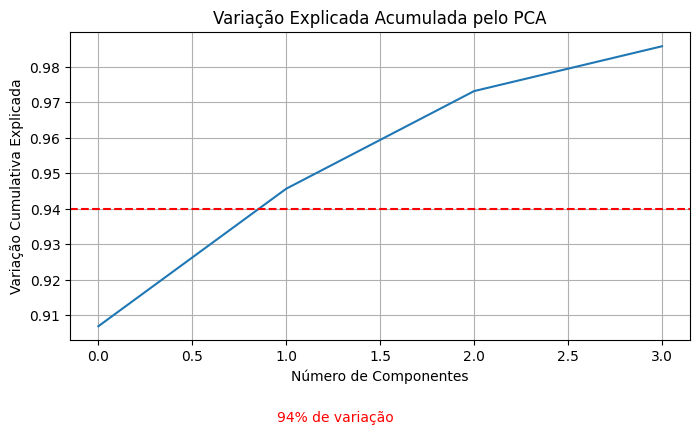

In [49]:
# Copiando variáveis necessárias
explainedVariance412 = explainedVariance

# Contribuição incremental de cada componente adicional e a identificar o ponto de cotovelo
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explainedVariance412))
plt.xlabel('Número de Componentes')
plt.ylabel('Variação Cumulativa Explicada')
plt.title('Variação Explicada Acumulada pelo PCA')
plt.axhline(y=0.94, color='r', linestyle='--')
plt.text(0.95, 0.88, '94% de variação', color = 'red')
plt.grid(True)
plt.show()


#### **4.1.3 - Análise Gráfica - Variação Explicada**



Este gráfico é uma ferramenta valiosa para entender como o PCA pode ser utilizado para identificar e priorizar os componentes mais informativos dos dados, facilitando análises mais eficientes e focadas.

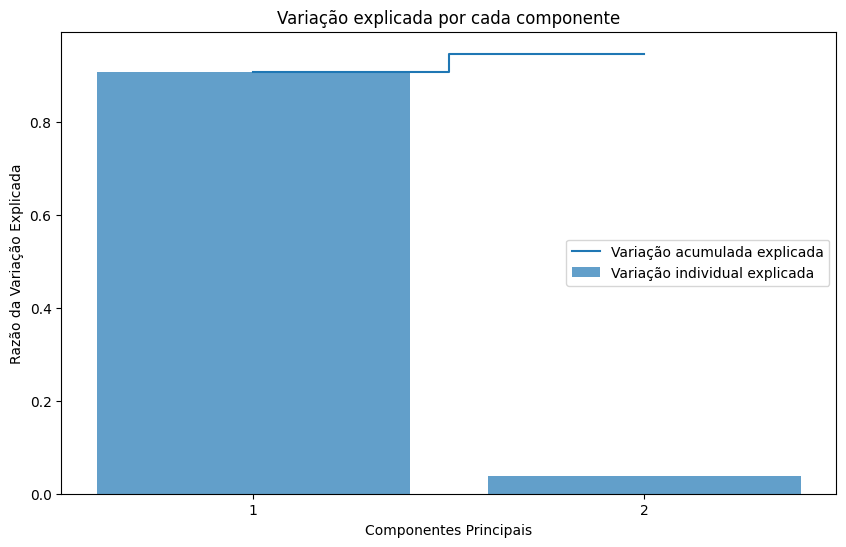

In [12]:
# Copiando variáveis necessárias
explainedVariance413 = explainedVariance
nComponents423 = nComponents

# Criando um gráfico de barras para a variação explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, nComponents423+1), explainedVariance413, alpha=0.7, align='center', label='Variação individual explicada')
plt.step(range(1, nComponents423+1), np.cumsum(explainedVariance413), where='mid', label='Variação acumulada explicada')
plt.ylabel('Razão da Variação Explicada')
plt.xlabel('Componentes Principais')
plt.legend(loc='best')
plt.xticks(range(1, nComponents423+1))
plt.title('Variação explicada por cada componente')
plt.show()

### **4.2 - Número Ideal de Clusters - Elbow Method**

Para determinar o número ideial de clusters utilizamos o método do cotovelo (elbow method). Esta técnica envolve a execução do algoritmo k-means para um intervalo de valores de k (número de clusters) e, em seguida, para cada valor de k, calcular a soma dos quadrados intra-cluster (WCSS).

#### **4.2.1 - Aplicação do Elbow Method**

In [ ]:
colunasInteresse = [ 
"pts",
"ast",
"stl",
"blk",
"tov",
"pf",
"fga",
"fg",
"x3p",
"x3pa",
"x2p",
"x2pa",
"age",
"experience",
"g",
"orb",
"drb",
"season",


]

# Criando um novo DataFrame com apenas as colunas de interesse
dfPlayerStats = df_agregado[colunasInteresse].copy()

# Tratando X em NaN
dfPlayerStats.fillna(0, inplace=True)

# Exibir as primeiras linhas do dataframe filtrado
dfPlayerStats.head(100)

pts  ast   stl   blk    tov   pf  fga   fg   x3p   x3pa  x2p  x2pa   age  \
0    521   54  49.0  49.0   99.0  229  388  209   1.0    6.0  208   382  22.0   
1    852   84  70.0  80.0  102.0  171  587  316   0.0    5.0  316   582  23.0   
2    937   93  87.0  45.0  120.0  204  640  322   0.0    2.0  322   638  24.0   
3   1088  103  94.0  55.0  119.0  172  758  401   4.0   17.0  397   741  25.0   
4   1061   90  66.0  50.0  116.0  207  806  385  13.0   46.0  372   760  26.0   
..   ...  ...   ...   ...    ...  ...  ...  ...   ...    ...  ...   ...   ...   
95   152  103  48.0  17.0   31.0  116  142   61  20.0   62.0   41    80  32.0   
96     7   11   5.0   0.0    2.0    7   12    3   0.0    2.0    3    10  33.0   
97    22   13   4.0   0.0    8.0   14   17   11   0.0    0.0   11    17  34.0   
98    16   24   4.0   1.0   11.0   13   18    6   0.0    0.0    6    18  22.0   
99   218   23  15.0   9.0   23.0   87  178   78  40.0  108.0   38    70  21.0   

    experience   g    orb    drb  season  
0            1  82  160.0  221.0    1986  
1            2  79  210.0  405.0    1987  
2            3  82  245.0  465.0    1988  
3            4  82  258.0  481.0    1989  
4            5  82  262.0  450.0    1990  
..         ...  ..    ...    ...     ...  
95          11  68   20.0  152.0    2005  
96          12  14    3.0   17.0    2006  
97          13  10    1.0   17.0    2007  
98           1  19    0.0   14.0    2006  
99           1  46   28.0   99.0    2021  

[100 rows x 18 columns]

In [14]:
# Copiando variáveis necessárias
df421 = dfPlayerStats.copy()

# Determina o número ideal de clusters usando o método do cotovelo
wcss = []
maxClusters = 15
for i in range(1, maxClusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)

    kmeans.fit(df421)
    wcss.append(kmeans.inertia_)

# Criando um DataFrame com a quantidade de clusters e WCSS
resultWCSS = pd.DataFrame({'Number of Clusters': range(1, maxClusters + 1), 'WCSS': wcss})

# Exibindo o DataFrame
print(resultWCSS.to_string(index=False))

 Number of Clusters         WCSS
                  1 2.269486e+10
                  2 8.660938e+09
                  3 5.339474e+09
                  4 4.043876e+09
                  5 3.402079e+09
                  6 2.999889e+09
                  7 2.774912e+09
                  8 2.565119e+09
                  9 2.394836e+09
                 10 2.237187e+09
                 11 2.119084e+09
                 12 2.003981e+09
                 13 1.901372e+09
                 14 1.820228e+09
                 15 1.747840e+09


#### **4.2.2 - Análise Gráfica Elbow Method**

Este tipo de gráfico é extremamente útil, pois a partir dele identificamos o declínio da WCSS onde ela começa a diminuir mais lentamente, formando um "cotovelo". Este ponto representa um equilíbrio entre minimizar a distância dentro dos clusters e maximizar o número de clusters, indicando um número de clusters que poderia ser considerado ótimo para os dados.

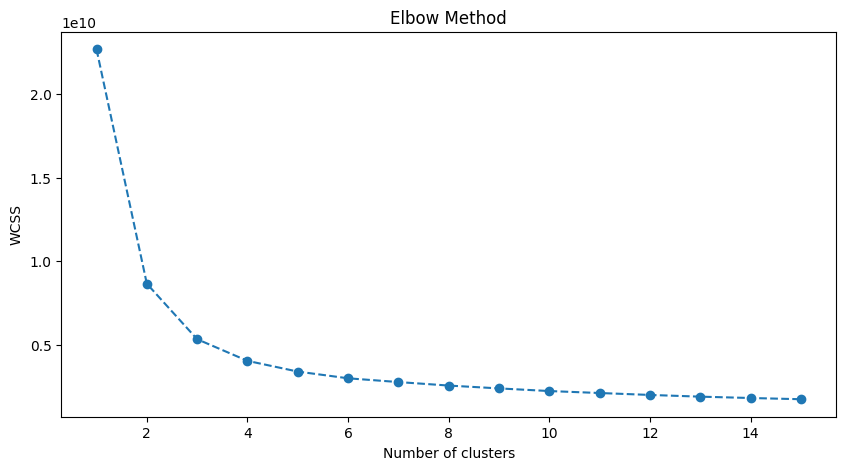

In [15]:
# Copiando variáveis necessárias
wcss422 = wcss.copy()
maxClusters422 = maxClusters

# Plotando os valores WCSS
plt.figure(figsize=(10,5))
plt.plot(range(1, maxClusters422+1), wcss422, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **4.3 - Algoritmo K-Means**

Nesta etapa, o objetivo é aplicar o algoritmo de agrupamento K-means aos dados transformados pela Análise de Componentes Principais (PCA) com o intuito de identificar grupos de indivíduos com perfis semelhantes de comorbidades. O K-means é um algoritmo de aprendizado não supervisionado que busca particionar os dados em um número pré-definido de grupos (clusters), de forma que os pontos dentro de cada cluster sejam o mais semelhantes possível e os pontos de diferentes clusters sejam o mais diferentes possível.

#### **4.3.1 - Aplicação do K-Means**

In [16]:
# Copiando variáveis necessárias
df431 = dfPCA.copy()

# Aplica agrupamento k-means com parâmetros refinados
nClusters = 4
kmeans = KMeans(n_clusters=nClusters, init='k-means++', n_init=50, max_iter=1000, random_state=42)
clusters = kmeans.fit_predict(df431)

# Converte clusters para uma Series do pandas e conta a quantidade de linhas em cada cluster
clusterCounts = pd.Series(clusters).value_counts()

# Imprime o resultado
print(clusterCounts)

3    10997
1     8181
0     5149
2     2029
Name: count, dtype: int64


#### **4.3.2 - Definindo os Clusters na Base**

In [17]:
# Copiando variáveis necessárias diretamente e adicionando a coluna 'Cluster'
dfClusteredR = dfPlayerStats.copy()
dfClusteredR['Cluster'] = clusters

# Exibindo as primeiras linhas dos DataFrames com os clusters
display(dfClusteredR.head())

pts  ast   stl   blk    tov   pf  fga   fg   x3p  x3pa  x2p  x2pa   age  \
0   521   54  49.0  49.0   99.0  229  388  209   1.0   6.0  208   382  22.0   
1   852   84  70.0  80.0  102.0  171  587  316   0.0   5.0  316   582  23.0   
2   937   93  87.0  45.0  120.0  204  640  322   0.0   2.0  322   638  24.0   
3  1088  103  94.0  55.0  119.0  172  758  401   4.0  17.0  397   741  25.0   
4  1061   90  66.0  50.0  116.0  207  806  385  13.0  46.0  372   760  26.0   

   experience   g    orb    drb  season  Cluster  
0           1  82  160.0  221.0    1986        1  
1           2  79  210.0  405.0    1987        1  
2           3  82  245.0  465.0    1988        0  
3           4  82  258.0  481.0    1989        0  
4           5  82  262.0  450.0    1990        0

### **4.4 - Verificação da Distrubuição dos Clusters - Silhouette Analysis**

A Análise de Silhueta é uma técnica de interpretação e validação de consistência dentro dos clusters de dados. Ela fornece uma maneira de avaliar graficamente o quão bem cada objeto foi classificado em seu cluster durante o algoritmo de clusterização, como o K-means.

O coeficiente de Silhueta varia de -1 a +1, onde um valor alto indica que a amostra está bem ajustada ao seu próprio cluster e mal ajustada a clusters vizinhos. Se muitas amostras têm um valor alto, então a configuração de cluster é apropriada. Se muitas amostras têm um valor baixo ou negativo, então as amostras podem ter sido atribuídas ao cluster errado.

#### **4.4.1 - Aplicação da Silhouette Analysis - Score**

In [18]:
# Copiando variáveis necessárias
df441 = dfPCA.copy()
clusters441 = clusters.copy()

# O silhouette_score dá a média do valor para todos os samples
silhouetteScore = silhouette_score(df441, clusters441)

print(silhouetteScore)

0.5141494508773123


#### **4.4.2 - Aplicação da Silhouette Analysis - Samples**

In [31]:
# Copiando variáveis necessárias
df442 = dfPCA.copy()
clusters442 = clusters.copy()

# Calcula os coeficientes de Silhouette para cada ponto
silhouetteSamples = silhouette_samples(df442, clusters442)

# Criando um DataFrame com os valores de Silhouette e os rótulos de cluster
resultSilhouetteSamples = pd.DataFrame({
    'Silhouette Value': silhouetteSamples,
    'Cluster Label': clusters442
})

# Exibindo o DataFrame criado
resultSilhouetteSamples.head(1000)

Silhouette Value  Cluster Label
0            0.558812              1
1            0.301951              1
2            0.045146              0
3            0.500480              0
4            0.505988              0
..                ...            ...
995          0.761674              3
996          0.223674              1
997         -0.037010              0
998          0.038075              0
999          0.296119              1

[1000 rows x 2 columns]

#### **4.4.3 - Análise Gráfica - Silhouette**

 *   O gráfico de silhueta ajuda a avaliar a qualidade dos clusters formados, fornecendo uma visão rápida de como cada ponto se encaixa dentro de seu cluster. Essas visualizações são cruciais para a otimização do modelo de clustering, pois indicam se o número de clusters escolhido é apropriado e se a distribuição dos clusters faz sentido com base na variabilidade dos dados.

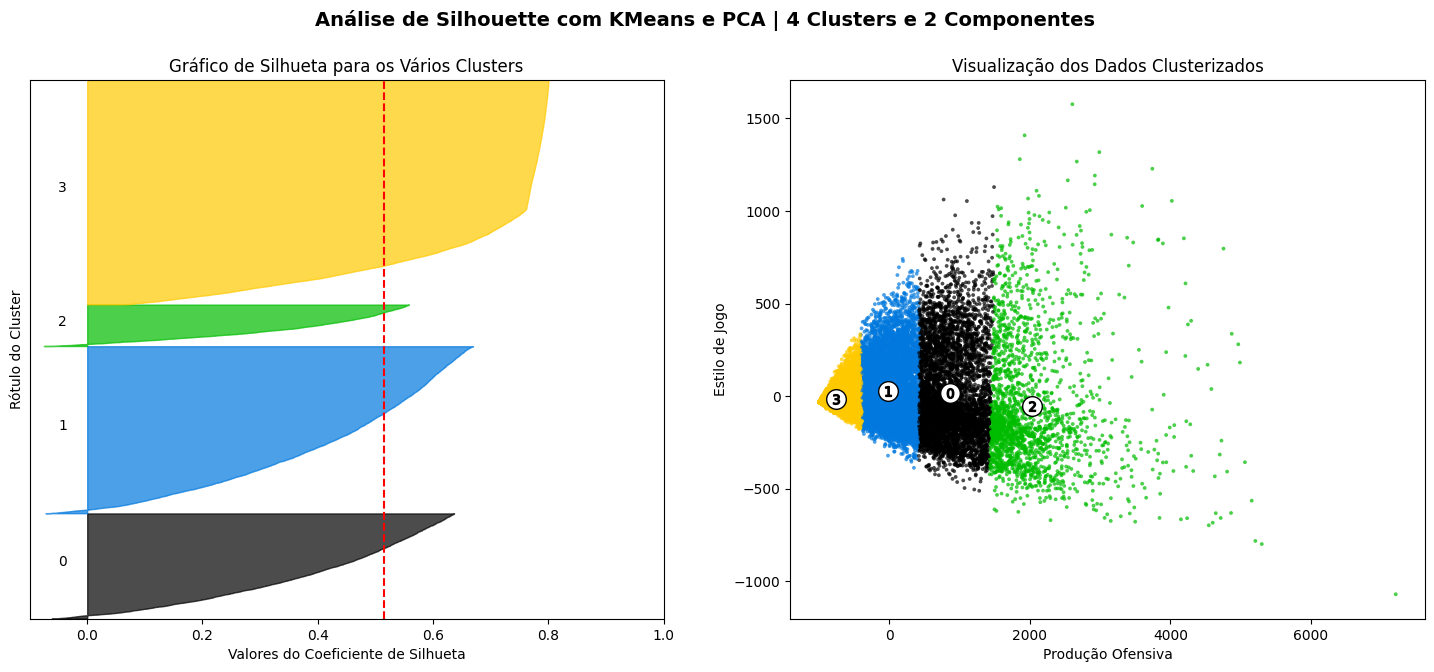

In [ ]:
# Copiando variáveis necessárias
nClusters443 = nClusters
nComponents443 = nComponentsFinal
df443 = dfPCA.copy()
clusters443 = clusters.copy()
silhouetteScore443 = silhouetteScore
silhouetteSamples443 = silhouetteSamples


cluster_colors = [cm.nipy_spectral(float(i) / nClusters443) for i in range(nClusters443)]

# Preparar o subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Definir limites para o gráfico de silhueta
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df443) + (nClusters443 + 1) * 10])

# Plotar o gráfico de silhueta
y_lower = 10
for i in range(nClusters443):
    ith_values = silhouetteSamples443[clusters443 == i]
    ith_values.sort()
    size_i = ith_values.shape[0]
    y_upper = y_lower + size_i

    # --- Adicionado: Usar a cor do mapa de cores pré-definido ---
    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10  # space between silhouettes

ax1.set_title("Gráfico de Silhueta para os Vários Clusters")
ax1.set_xlabel("Valores do Coeficiente de Silhueta")
ax1.set_ylabel("Rótulo do Cluster")
ax1.axvline(x=silhouetteScore443, color="red", linestyle="--")
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_yticks([])  # Limpar yticks para simplificar

# Plotar os dados clusterizados
colors = [cluster_colors[label] for label in clusters443]
ax2.scatter(df443[:, 0], df443[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')


# Correto: Pega os centros do modelo ORIGINAL já treinado.
centers = kmeans.cluster_centers_

ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("Visualização dos Dados Clusterizados")
ax2.set_xlabel("Produção Ofensiva")
ax2.set_ylabel("Estilo de Jogo")

plt.suptitle(f"Análise de Silhouette com KMeans e PCA | {nClusters443} Clusters e {nComponents443} Componentes", fontsize=14, fontweight='bold')
plt.show()

### **4.5 - Análise Descritiva - PCA, Elbow Method e Silhouette**

**Análise de Componentes Principais (PCA)**: A Análise de Componentes Principais (PCA) foi aplicada para reduzir a complexidade das diversas estatísticas de desempenho (pontos, rebotes, assistências, etc.).

* Os **dois primeiros componentes principais sozinhos capturam 95% da variação total** dos dados. Isso significa que podemos representar o perfil de um jogador em um gráfico 2D com uma perda mínima de informação.
* O primeiro componente (PC1) é o mais dominante, explicando **91,6%** da variância. Ele pode ser interpretado como um eixo de **"Impacto Geral"** ou **"Volume de Produção Estatística"**. Jogadores com pontuação alta neste eixo são, provavelmente, as estrelas e jogadores de alto volume que impactam o jogo em várias frentes.
* O segundo componente (PC2), com **3,5%** da variância, captura uma dimensão secundária do desempenho, provavelmente relacionada ao **"Estilo de Jogo"** ou **"Função em Quadra"**. Ele pode diferenciar, por exemplo, jogadores de garrafão (pivôs) de jogadores de perímetro (armadores), ou especialistas ofensivos de especialistas defensivos.



**Método do Cotovelo (Elbow Method):** O gráfico gerado mostrou um "cotovelo" nítido em **k=4**. Isso indica que, ao passar de 3 para 4 clusters, houve um ganho significativo na coesão dos grupos. No entanto, adicionar mais de quatro clusters traria um benefício marginal, sugerindo que 4 é o ponto de equilíbrio ideal.

**Análise de Silhueta (Silhouette Analysis):** Esta análise confirmou a escolha de 4 clusters como a mais robusta. Obtivemos um **score médio de silhueta de 0.538**, um valor forte que indica que os agrupamentos são densos (jogadores dentro de um mesmo perfil são semelhantes entre si) e bem separados (os diferentes perfis de jogadores são distintos uns dos outros).



### **4.6 - Erro do Agrupamento**

O WCSS (Within-Cluster Sum of Squares) é uma medida da variabilidade dos pontos de dados dentro de cada cluster. Quanto menor o valor do WCSS, mais densamente agrupados e homogêneos estão os jogadores dentro de seus respectivos perfis. O erro médio por ponto, por sua vez, nos dá uma ideia de quanto, em média, cada jogador difere do arquétipo central do cluster ao qual foi atribuído.

Para o nosso modelo final com 4 clusters, a soma dos quadrados intra-cluster (WCSS) foi de aproximadamente 2.837.074.648, resultando em um erro médio por ponto de 107.644.

In [21]:
# Copiando variáveis necessárias
kmeans46 = kmeans
df46 = dfPlayerStats.copy()

# Calcula o WCSS (inércia) para o agrupamento
wcssValue = kmeans46.inertia_

# Calcula o erro médio por ponto (inércia dividida pelo número de amostras)
erroMedioPorPonto = wcssValue / df46.shape[0]

# Exibe o erro médio por ponto
print(f'dispersão dos pontos de dados: {wcssValue}')
print(f'Erro médio por ponto: {erroMedioPorPonto}')

dispersão dos pontos de dados: 2837074648.2297125
Erro médio por ponto: 107644.35605667447


## **Etapa 5 - Consolidação dos Dados**

Nesta etapa, procedemos à consolidação e a exportação dos dados, que agora incorpora a coluna cluster.

### **5.1 - Análise da Média de Cada Atributo por Cluster**

Cria um dataframe com a média de cada atributo distribuída por clusters. Essas informações podem ser úteis para entender as características predominantes em cada cluster.

In [22]:
# Copiando variáveis necessárias
df51 = dfClusteredR.copy()

# Calcula a média de cada atributo por cluster
dfClusterMeans = df51.groupby('Cluster').mean()

# Mostra as medias dos clusters
dfClusterMeans.transpose()

Cluster               0            1            2            3
pts         1143.377161   593.429287  1884.268605   135.869237
ast          254.371528   143.210732   357.099064    33.248159
stl           67.105263    44.481848    86.122228    12.255160
blk           38.500486    27.929226    51.104485     8.808311
tov          131.357351    74.914069   186.597831    21.079476
pf           215.024471   162.224300   272.270577    52.170774
fga          947.343950   509.964430  1532.039428   123.144494
fg           435.056904   226.457890   716.259241    51.823588
x3p           46.540882    32.274783    52.653031     7.578703
x3pa         130.511167    90.548833   150.612617    23.152223
x2p          388.516023   194.183107   663.606210    44.244885
x2pa         816.832783   419.415597  1381.426811    99.992271
age           26.550204    26.595160    26.759487    26.061017
experience     5.574675     5.233957     5.920158     4.232063
g             81.361235    72.122723    98.062592    34.324998
orb          104.963682    71.363770   142.434204    21.956625
drb          265.035735   173.484537   359.515525    48.620169
season      1992.797242  1995.420975  1988.358797  1998.237610

### **5.2 - Exportação dos Dados - Média de Atributo por Cluster**

Cria um dataframe com a média de cada atributo distribuída por clusters. Essas informações podem ser úteis para entender as características predominantes em cada cluster.

In [23]:
# Copiando variáveis necessárias
df52 = dfClusterMeans.copy()

# Criando um novo DataFrame para uso nessa célula
clusterMeansTranspose = df52.transpose()

# Resetar o índice para transformar o índice atual em uma coluna
clusterMeansTranspose.reset_index(inplace=True)

# Atribua novamente os nomes das colunas, agora incluindo o novo índice como coluna
nomes_colunas = ['Nome_do_Atributo', 'Especialista/Recurso', 'Regular', 'Role-Player', 'All-Star']
clusterMeansTranspose.columns = nomes_colunas

# Exporta o DataFrame com as médias dos clusters para um arquivo XLSX
xlsx_file_path = 'PNS - Agrupamento - Médias.xlsx'
clusterMeansTranspose.to_excel(xlsx_file_path, index=True)

# Verifique se as mudanças foram aplicadas
clusterMeansTranspose.head()

Nome_do_Atributo  Especialista/Recurso     Regular  Role-Player    All-Star
0              pts           1143.377161  593.429287  1884.268605  135.869237
1              ast            254.371528  143.210732   357.099064   33.248159
2              stl             67.105263   44.481848    86.122228   12.255160
3              blk             38.500486   27.929226    51.104485    8.808311
4              tov            131.357351   74.914069   186.597831   21.079476

### **5.3 - Exportação dos Dados - Clusters**

Nessa étapa, procedemos à exportação dos dados, que agora incluem uma coluna 'clusters'. Esta coluna é essencial para identificar a qual grupo ou categoria cada entrada do conjunto de dados pertence, baseado nos critérios de agrupamento previamente estabelecidos.

In [24]:
# Copiando variáveis necessárias

df53R = dfClusteredR.copy()

# Exporta o DataFrame com as médias dos clusters para um arquivo XLSX

xlsx_file_path_R = 'NBA - Agrupamento.xlsx'


df53R.to_excel(xlsx_file_path_R, index=True)

## **Etapa 6 - Análises gráficas dos clusters**

Nesta parte efetuamos a plotagem e análise de gráficos referentes aos clusters gerados pelo algoritmo K-Means, com o intuito de interpretar e compreender as agrupações relacionadas ao desempenho de pontuações dos jogadores.

### **6.1 - Mapa de Calor**

O mapa de calor é bastante útil para identificar rapidamente padrões e diferenças entre os clusters, facilitando a compreensão dos dados.

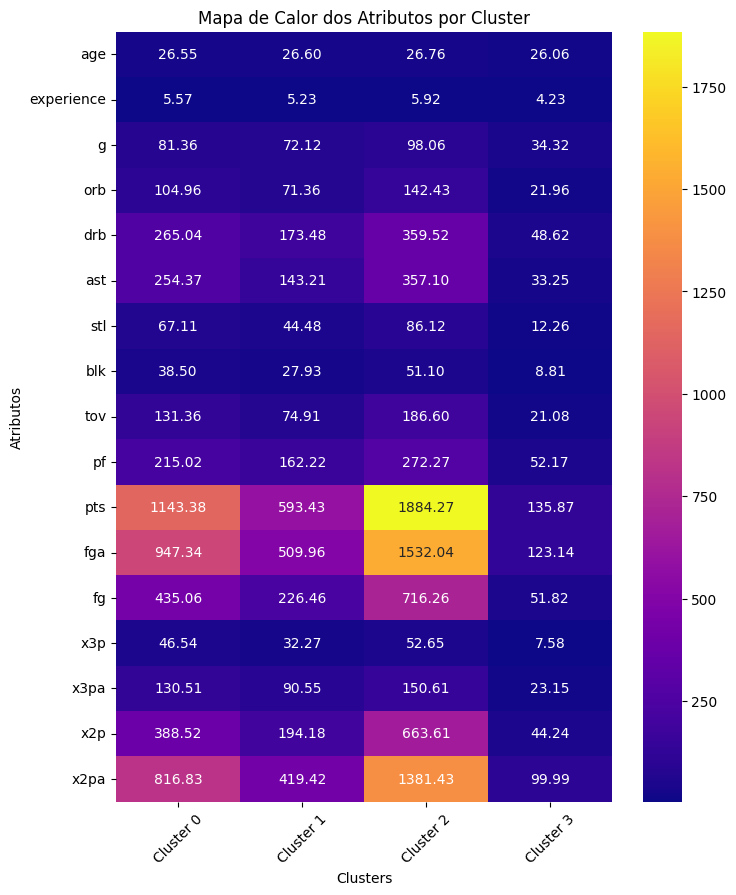

In [25]:
# Copiando variáveis necessárias
df61 = dfClusterMeans.copy()

# A lista de atributos que você DESEJA usar
atributos_desejados = [
    'age',
    'experience',
    'g',
    'orb',
    'drb',
    'ast',
    'stl',
    'blk',
    'tov',
    'pf',
    'pts',
    'fga',
    'fg',        
    'x3p',       
    'x3pa',      
    'x2p',       
    'x2pa',      
]


# 2. Filtra a lista para usar apenas os atributos que existem em df61
atributos_existentes = [attr for attr in atributos_desejados if attr in df61.columns]

# 3. Avisa quais atributos foram ignorados
atributos_faltantes = set(atributos_desejados) - set(atributos_existentes)


# 4. Seleciona as colunas usando a lista filtrada e segura
dfHeatMap = df61[atributos_existentes].transpose()

# Ajustando o tamanho da figura para aumentar a altura das linhas
plt.figure(figsize=(8, 10))

# Criando o mapa de calor com a paleta de cores 'plasma'
ax = sns.heatmap(dfHeatMap, annot=True, cmap='plasma', fmt=".2f", linewidths=0, linecolor='white')
plt.title('Mapa de Calor dos Atributos por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Atributos')

# Adicionando títulos para cada cluster
ax.set_xticklabels([f'Cluster {i}' for i in range(dfHeatMap.shape[1])])

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### **6.2 - Diagrama de Radar**

O diagrama de radar é uma visualização de dados usada para exibir informações multivariadas de maneira bidimensional. É especialmente útil para comparar múltiplos itens ou casos em relação a várias características.

In [ ]:
# Importações necessárias
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler # <--- MUDANÇA: Usaremos o StandardScaler
import numpy as np

# A sua função para gerar o gráfico (sem modificações)
def gerar_diagrma_radar(df, attributes):
  fig = go.Figure()
  cluster_colors = ['lightcoral', 'skyblue', 'gold', 'limegreen']
  for idx in df.index:
      fig.add_trace(go.Scatterpolar(
          r=df.loc[idx, attributes].values,
          theta=attributes,
          fill='toself',
          name=f'Cluster {idx}',
          hoverinfo='all',
          line=dict(color=cluster_colors[idx])
      ))
  # MUDANÇA: O título e o range do eixo foram atualizados
  fig.update_layout(
      title='DNA dos Clusters (Comparativo com a Média da Liga)',
      polar=dict(
          radialaxis=dict(
              visible=True,
          )),
      showlegend=True,
      width=1000,
      height=800
  )
  fig.show()

# Copiando variáveis necessárias
df62 = dfClusterMeans.copy()
atributos_desejados = [
    'age', 'experience', 'g', 'orb', 'drb', 'ast', 'stl', 'blk',
    'tov', 'pf', 'pts', 'fga', 'fg', 'x3p', 'x3pa', 'x2p', 'x2pa'
]

scaler = StandardScaler()

# O StandardScaler precisa ser treinado nos dados originais de todos os jogadores para saber a média e o desvio padrão da "liga"
# Assumindo que seu DataFrame com todos os jogadores antes do cluster se chama 'dfPlayerStats'
scaler.fit(dfPlayerStats[atributos_desejados])

# Agora, transformamos as médias dos nossos clusters usando essa escala da "liga"
df_radar_scaled_std = pd.DataFrame(scaler.transform(df62[atributos_desejados]),
                                   index=df62.index,
                                   columns=atributos_desejados)



# 2. ADAPTAÇÃO PARA O GRÁFICO DE RADAR
min_val = df_radar_scaled_std.min().min() # Encontra o menor valor em toda a tabela
df_radar_final = df_radar_scaled_std - min_val # Subtrai o valor negativo (ou seja, soma o seu absoluto)





# --- FIM DA ADAPTAÇÃO ---

# 3. GERAR O NOVO GRÁFICO DE RADAR
# Usamos o DataFrame final adaptado
gerar_diagrma_radar(df_radar_final, atributos_desejados)

### **6.3 - Gráficos de Barras**

O Grafico de Barras para comparativo entre clusters é uma maneira eficiente de visualizar as distribuições de um atributo específico entre diferentes grupos.

In [27]:
def gerar_grafico_barras_interativo_corrigido(df, lista_de_atributos):
    """
    Versão corrigida e adaptada da função:
    1. Corrige o cálculo e a exibição de porcentagens.
    2. Usa uma paleta de cores dinâmica que funciona para qualquer número de clusters.
    """
    fig = go.Figure()

    # Usar uma paleta de cores do Plotly que se ajusta ao número de clusters
    # Isso evita erros se houver mais de 4 clusters
    num_clusters = len(df.index)
    cores_clusters = px.colors.qualitative.Plotly[:num_clusters]

    # Itera sobre cada atributo para criar um traço (trace) no gráfico
    for idx, atributo in enumerate(lista_de_atributos):
        fig.add_trace(
            go.Bar(
                # O eixo X são os clusters (0, 1, 2, ...)
                x=df.index.astype(str),
                # O eixo Y são os valores do atributo (ex: 0.35 para 35%)
                y=df[atributo],
                name=atributo,
                # Deixa apenas o primeiro atributo visível inicialmente
                visible=(idx == 0),
                # Exibe o valor em formato de porcentagem sobre as barras
                texttemplate='%{y:.1%}',
                textposition='outside',
                marker_color=cores_clusters # Aplica as cores dinâmicas
            )
        )

    # Cria os botões para o menu dropdown
    botões = [{
        'label': atributo,
        'method': 'update',
        'args': [
            # Atualiza a visibilidade para mostrar apenas o traço selecionado
            {'visible': [i == idx for i in range(len(lista_de_atributos))]},
            # Atualiza o título do gráfico e do eixo Y
            {'title': f'Média de "{atributo}" por Cluster',
             'yaxis.title': 'Média'}
        ]
    } for idx, atributo in enumerate(lista_de_atributos)]

    # Atualiza o layout do gráfico com o menu dropdown
    fig.update_layout(
        updatemenus=[{
            'buttons': botões,
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'xanchor': 'center',
            'y': 1.15,
            'yanchor': 'top',
        }],
        # Título e eixos para a visualização inicial
        title_text=f'Média de "{lista_de_atributos[0]}" por Cluster',
        xaxis_title='Cluster',
        yaxis_title='Média',
        # Formata o eixo Y para exibir como porcentagem
        yaxis_tickformat='.0%',
        height=700, # Ajustei a altura para um valor mais comum
        showlegend=False
    )

    fig.show()

# --- Seu código para chamar a função ---

# Copiando variáveis necessárias
df63 = dfClusterMeans.copy()

# A sua lista de atributos de saúde
atributos_saude = [
  'age', 'experience', 'g', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fga'
]

# Gerando o gráfico de barras interativo com a função corrigida
gerar_grafico_barras_interativo_corrigido(df63, atributos_saude)

### **6.4 - Gráficos de Bolhas**


Gráficos de Bolhas ajuda na análise exploratória de dados, permitindo a visualização simultânea de múltiplas dimensões e a identificação rápida de padrões, relações e outliers em conjuntos de dados complexos, especialmente em cenários de clusterização, facilitando a tomada de decisões baseadas em dados.

In [28]:
def gerar_grafico_bolhas_numerico(df, x_attr, y_attr, size_attr, color_attr='Cluster', hover_attrs=None):
    """
    Gera um gráfico de bolhas interativo para dados numéricos.

    Args:
        df (pd.DataFrame): O DataFrame com os dados.
        x_attr (str): O nome da coluna para o eixo X.
        y_attr (str): O nome da coluna para o eixo Y.
        size_attr (str): O nome da coluna para o tamanho da bolha.
        color_attr (str): O nome da coluna para a cor da bolha (default 'Cluster').
        hover_attrs (list): Lista de colunas adicionais para mostrar no hover.
    """
    if hover_attrs is None:
        hover_attrs = [] # Garante que hover_attrs seja uma lista

    fig = px.scatter(
        df,
        x=x_attr,
        y=y_attr,
        size=size_attr,
        color=color_attr,
        hover_data=[color_attr] + hover_attrs,
        title=f'Relação entre {y_attr}, {x_attr} e {size_attr} por Cluster',
        labels={
            x_attr: f'Média de {x_attr}',
            y_attr: f'Média de {y_attr}',
            size_attr: f'Tamanho por {size_attr}'
        }
    )

    fig.update_layout(
        height=700,
        xaxis_title=f'{x_attr.capitalize()}',
        yaxis_title=f'{y_attr.capitalize()}',
        legend_title_text='Clusters'
    )
    fig.show()

# --- Como usar a nova função com seus dados ---

# Usaremos o dfClusterMeans para ver a média de cada atributo por cluster
df_basquete_means = dfClusterMeans.copy()

# A lista de atributos de basquete que sabemos que existem
atributos_basquete = [
    'age', 'experience', 'g', 'orb', 'drb', 'ast', 'stl', 'blk',
    'tov', 'pf', 'pts', 'fga'
]

# Adicionando a coluna 'Cluster' ao DataFrame de médias para a plotagem
df_basquete_means['Cluster'] = df_basquete_means.index

# Gerando o gráfico de bolhas
# Exemplo: Experiência vs. Pontos, com tamanho da bolha por Assistências
gerar_grafico_bolhas_numerico(
    df=df_basquete_means,
    x_attr='experience', 
    y_attr='pts',
    size_attr='ast',
    hover_attrs=['age', 'g', 'orb']
)

## **Etapa 7 - Análise descritiva dos Clusters**

Nesta etapa é realizada a análise descritiva dos Clusters 0, 1, 2 e 3, com base no agrupamento realizado e análises gráficas realizadas. Que revela uma série de diferenças marcantes que refletem as diversas necessidades de saúde, padrões de vida e características demográficas.

### **Cluster 0: Arquétipo de Titular de Elite e Segunda Opção Ofensiva**

Este cluster define a segunda estrela ou a principal opção ofensiva complementar de uma equipe. São tipicamente veteranos cuja função em quadra é gerar um alto volume de produção em múltiplas categorias. Como jogadores titulares e peças importantes do esquema ofensivo, seu impacto é de alto nível, embora não possuam a dominância estatística geral do Cluster 2.

**Perfil Demográfico:**
* Idade: 26.55
* Experiência: 5.57

**Durabilidade e Volume de Jogo:**
* Jogos Disputados: 81.36

**Produção Ofensiva:**
* Pontos: 1143.38
* Arremessos de Quadra Tentados: 947.34
* Assistências: 254.37

**Contribuição Defensiva e Rebotes:**
* Rebotes Ofensivos: 104.96
* Rebotes Defensivos: 265.04
* Roubos de Bola: 67.11
* Tocos: 38.50

**Métricas de Erro:**
* Turnovers (Erros): 131.36
* Faltas Pessoais: 215.02

### **Cluster 1: Arquétipo de Jogador de Rotação Sólido (Role Player)**

Este arquétipo corresponde aos jogadores de rotação essenciais, frequentemente referidos como *role players*. São atletas que cumprem funções específicas, seja como especialistas defensivos, criadores secundários ou pontuadores vindos do banco. Sua produção é característica de um contribuidor sólido que pode ou não ser titular, mas que possui um papel definido em uma equipe competitiva.

**Perfil Demográfico:**
* Idade: 26.60
* Experiência: 5.23

**Durabilidade e Volume de Jogo:**
* Jogos Disputados: 72.12

**Produção Ofensiva:**
* Pontos: 593.43
* Arremessos de Quadra Tentados: 509.96
* Assistências: 143.21

**Contribuição Defensiva e Rebotes:**
* Rebotes Ofensivos: 71.36
* Rebotes Defensivos: 173.48
* Roubos de Bola: 44.48
* Tocos: 27.93

**Métricas de Erro:**
* Turnovers (Erros): 74.91
* Faltas Pessoais: 162.22

### **Cluster 2: Arquétipo All-NBA e Jogador de Franquia**

Este segmento representa a elite da liga. São jogadores de calibre *All-Star* e candidatos a prêmios *All-NBA*, que funcionam como o principal motor ofensivo e, frequentemente, defensivo de suas equipes. A combinação de alta experiência com produção estatística de ponta em múltiplas categorias os define como "franchise players" — atletas em torno dos quais uma equipe é construída. O alto volume de arremessos e assistências sugere uma elevada taxa de uso (*usage rate*).

**Perfil Demográfico:**
* Idade: 26.76
* Experiência: 5.92

**Durabilidade e Volume de Jogo:**
* Jogos Disputados: 98.06

**Produção Ofensiva:**
* Pontos: 1884.27
* Arremessos de Quadra Tentados: 1532.04
* Assistências: 357.10

**Contribuição Defensiva e Rebotes:**
* Rebotes Ofensivos: 142.43
* Rebotes Defensivos: 359.52
* Roubos de Bola: 86.12
* Tocos: 51.10

**Métricas de Erro:**
* Turnovers (Erros): 186.60
* Faltas Pessoais: 272.27


### **Cluster 3: Atletas com Participação Marginal na Rotação**

Este cluster representa atletas que não integram a rotação principal de uma equipe. O perfil se alinha a três possibilidades no ecossistema da NBA: 1) jovens atletas em desenvolvimento, como calouros tardios ou jogadores com contratos *two-way*; 2) veteranos em final de carreira com papéis extremamente situacionais; ou 3) jogadores que enfrentaram lesões durante a temporada. Sua baixa amostragem de minutos e produção os coloca na periferia do elenco ativo.

**Perfil Demográfico:**
* Idade: 26.06
* Experiência: 4.23

**Durabilidade e Volume de Jogo:**
* Jogos Disputados: 34.32

**Produção Ofensiva:**
* Pontos: 135.87
* Arremessos de Quadra Tentados: 123.14
* Assistências: 33.25

**Contribuição Defensiva e Rebotes:**
* Rebotes Ofensivos: 21.96
* Rebotes Defensivos: 48.62
* Roubos de Bola: 12.26
* Tocos: 8.81

**Métricas de Erro:**
* Turnovers (Erros): 21.08
* Faltas Pessoais: 52.17

### **7.5 - Análise entre os Clusters**

### **Resumo da Análise de Clusters de Jogadores da NBA**

A análise de clusterização revelou com sucesso a estrutura de papéis na NBA, dividindo os jogadores em quatro arquétipos claros que vão desde a elite da liga até os atletas de suporte. A principal conclusão é que o impacto de um jogador é definido por seu perfil de contribuição, com os **Clusters 0 e 3** representando os diferentes tipos de protagonismo que levam ao sucesso.

### **Pontos de Destaque:**

* **Dois Perfis de Estrelato (Clusters 0 e 3):** A análise identifica duas categorias distintas de jogadores de elite:
    * **Superestrelas Completas (Cluster 0):** Representam o topo da pirâmide. São os jogadores que lideram em praticamente todas as estatísticas (pontos, assistências, rebotes), definindo o sucesso de suas franquias.
    * **Pontuadores de Elite (Cluster 3):** Um tipo diferente de estrela, com foco na pontuação. Embora não dominem todas as áreas como o Cluster 0, seu impacto vem do alto volume ofensivo, sendo a principal arma de ataque de suas equipes.

* **A base dos times (Cluster 1):** O sucesso das estrelas depende deste grupo. São os veteranos confiáveis e consistentes que formam a espinha dorsal da rotação. Não lideram em estatísticas, mas seu papel de suporte é fundamental para a estrutura e o sucesso de uma equipe competitiva.

* **Baixo rendimento e aguardando chances (Cluster 2):** Este grupo, com participação e produção mínimas, serve para contextualizar o altíssimo nível de exigência da NBA. Ele representa a base da pirâmide de talento e destaca o quão excepcional é a performance dos outros perfis.

* **Conclusão Estratégica:** O estudo mostra que o impacto na NBA não é monolítico. Equipes vencedoras são um ecossistema que necessita tanto das superestrelas dominantes (Cluster 0) e dos especialistas ofensivos (Cluster 3) quanto da base sólida de jogadores de suporte (Cluster 1) para competir em alto nível.